In [17]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
filepath="/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df1=pd.read_csv(f"{filepath}/vcb.csv")
df2=pd.read_csv(f"{filepath}/vnindex.csv")

In [19]:
df1

,date,code,high,low,open,close,volume_match
0,10/1/2019,VCB,83.6,81.8,82.1,83.4,795100
1,10/2/2019,VCB,83.7,81.7,83.4,82.0,1224650
2,10/3/2019,VCB,82.0,80.6,81.8,82.0,1003810
3,10/4/2019,VCB,83.5,81.8,82.0,83.0,1121700
4,10/7/2019,VCB,84.5,82.8,82.0,82.8,1134390
...,...,...,...,...,...,...,...
1366,12/25/2024,VCB,93.8,92.2,92.2,92.4,1827700
1367,12/26/2024,VCB,92.8,92.0,92.5,92.1,2202900
1368,12/27/2024,VCB,93.0,92.2,92.5,92.2,1639900
1369,12/30/2024,VCB,92.5,92.0,92.2,92.0,1706700


In [20]:
# Convert 'date' column to pandas datetime format
df1['date'] = pd.to_datetime(df1['date'])  # Convert to datetime
df1.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df1 = df1.sort_index()  # Ensure it's sorted

In [21]:
df1

,code,high,low,open,close,volume_match
date,,,,,,
2019-10-01,VCB,83.6,81.8,82.1,83.4,795100
2019-10-02,VCB,83.7,81.7,83.4,82.0,1224650
2019-10-03,VCB,82.0,80.6,81.8,82.0,1003810
2019-10-04,VCB,83.5,81.8,82.0,83.0,1121700
2019-10-07,VCB,84.5,82.8,82.0,82.8,1134390
...,...,...,...,...,...,...
2024-12-25,VCB,93.8,92.2,92.2,92.4,1827700
2024-12-26,VCB,92.8,92.0,92.5,92.1,2202900
2024-12-27,VCB,93.0,92.2,92.5,92.2,1639900


In [22]:
# Convert 'date' column to pandas datetime format
df2['date'] = pd.to_datetime(df2['date'])  # Convert to datetime
df2.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df2 = df2.sort_index()  # Ensure it's sorted

In [23]:
df2

,code,high,low,open,close,adjust,volume_match,value_match
date,,,,,,,,
2019-10-01,VNINDEX,999.72,996.20,997.87,999.59,999.59,138885870.0,3.113323e+12
2019-10-02,VNINDEX,1000.93,989.63,999.18,991.19,991.19,152337130.0,3.552889e+12
2019-10-03,VNINDEX,992.45,983.35,985.65,992.45,992.45,153492420.0,3.243848e+12
2019-10-04,VNINDEX,994.81,987.59,993.69,987.59,987.59,150673460.0,3.264212e+12
2019-10-07,VNINDEX,990.34,983.09,989.45,983.09,983.09,147636100.0,3.089197e+12
...,...,...,...,...,...,...,...,...
2024-12-25,VNINDEX,1283.09,1261.87,1262.03,1274.04,1274.04,724345690.0,1.651200e+13
2024-12-26,VNINDEX,1277.17,1271.99,1275.68,1272.87,1272.87,502071890.0,1.064038e+13
2024-12-27,VNINDEX,1277.89,1272.23,1275.56,1275.14,1275.14,579882989.0,1.328606e+13


In [24]:
# Tính EMA 12 ngày và EMA 26 ngày
df2['ema_12'] = df2['close'].ewm(span=12, adjust=False).mean()
df2['ema_26'] = df2['close'].ewm(span=26, adjust=False).mean()

# Tính MACD
df2['macd'] = df2['ema_12'] - df2['ema_26']

# Tính Signal Line (EMA 9 ngày của MACD)
df2['macd_signal'] = df2['macd'].ewm(span=9, adjust=False).mean()

# Hiển thị kết quả
print(df2[['close', 'macd', 'macd_signal']].head())


             close      macd  macd_signal
date                                     
2019-10-01  999.59  0.000000     0.000000
2019-10-02  991.19 -0.670085    -0.134017
2019-10-03  992.45 -1.086932    -0.324600
2019-10-04  987.59 -1.788827    -0.617445
2019-10-07  983.09 -2.677333    -1.029423


In [25]:
df2

,code,high,low,open,close,adjust,volume_match,value_match,ema_12,ema_26,macd,macd_signal
date,,,,,,,,,,,,
2019-10-01,VNINDEX,999.72,996.20,997.87,999.59,999.59,138885870.0,3.113323e+12,999.590000,999.590000,0.000000,0.000000
2019-10-02,VNINDEX,1000.93,989.63,999.18,991.19,991.19,152337130.0,3.552889e+12,998.297692,998.967778,-0.670085,-0.134017
2019-10-03,VNINDEX,992.45,983.35,985.65,992.45,992.45,153492420.0,3.243848e+12,997.398047,998.484979,-1.086932,-0.324600
2019-10-04,VNINDEX,994.81,987.59,993.69,987.59,987.59,150673460.0,3.264212e+12,995.889117,997.677944,-1.788827,-0.617445
2019-10-07,VNINDEX,990.34,983.09,989.45,983.09,983.09,147636100.0,3.089197e+12,993.920022,996.597355,-2.677333,-1.029423
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,VNINDEX,1283.09,1261.87,1262.03,1274.04,1274.04,724345690.0,1.651200e+13,1262.507215,1258.347473,4.159742,3.725967
2024-12-26,VNINDEX,1277.17,1271.99,1275.68,1272.87,1272.87,502071890.0,1.064038e+13,1264.101490,1259.423215,4.678274,3.916428
2024-12-27,VNINDEX,1277.89,1272.23,1275.56,1275.14,1275.14,579882989.0,1.328606e+13,1265.799722,1260.587422,5.212300,4.175603


In [26]:
df3=pd.read_csv(f"{filepath}/bullish.csv")

In [27]:
df3

,date,total_articles,bullish_index,dominant_sentiment
0,2019-10-01,12,0.625000,neutral
1,2019-10-02,13,0.769231,positive
2,2019-10-03,12,0.625000,positive
3,2019-10-04,22,0.659091,positive
4,2019-10-07,17,0.441176,negative
...,...,...,...,...
1366,2024-12-25,44,0.625000,neutral
1367,2024-12-26,43,0.639535,positive
1368,2024-12-27,56,0.580357,positive
1369,2024-12-30,47,0.574468,positive


In [29]:
# Convert 'date' column to pandas datetime format
df3['date'] = pd.to_datetime(df3['date'])  # Convert to datetime
df3.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df3 = df3.sort_index()  # Ensure it's sorted

In [30]:
df3

,total_articles,bullish_index,dominant_sentiment
date,,,
2019-10-01,12,0.625000,neutral
2019-10-02,13,0.769231,positive
2019-10-03,12,0.625000,positive
2019-10-04,22,0.659091,positive
2019-10-07,17,0.441176,negative
...,...,...,...
2024-12-25,44,0.625000,neutral
2024-12-26,43,0.639535,positive
2024-12-27,56,0.580357,positive


In [31]:
# Mã hóa sentiment thành các giá trị số
df3['sentiment_encoded'] = df3['dominant_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Kiểm tra kết quả
# Use df3.index to access the date which is now the index
print(df3[['dominant_sentiment', 'sentiment_encoded']].head())
print(df3.index[:5]) # Print the first 5 dates from the index


           dominant_sentiment  sentiment_encoded
date                                            
2019-10-01            neutral                  0
2019-10-02           positive                  1
2019-10-03           positive                  1
2019-10-04           positive                  1
2019-10-07           negative                 -1
DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-07'],
              dtype='datetime64[ns]', name='date', freq=None)


In [32]:
# Thiết lập seed CỐ ĐỊNH - đặt ở đầu script
import os
import random
import numpy as np
import torch

# Thiết lập seed cho tất cả các thành phần
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)  # Thiết lập seed cho Python hash
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Tiếp tục với các import còn lại
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from torch.utils.data import TensorDataset, DataLoader

In [33]:
# Kết hợp dữ liệu từ các dataframe
df_combined = pd.DataFrame()
df_combined['vcb_close'] = df1['close']
df_combined['vnindex_close'] = df2['close']
df_combined['vnindex_macd'] = df2['macd']
df_combined['sentiment'] = df3['sentiment_encoded']

In [34]:
df_combined = df_combined.loc['2020-01-01':'2024-12-31']

# Xử lý dữ liệu thiếu
df_combined = df_combined.dropna()
print(f"Shape of combined data: {df_combined.shape}")
print(f"Date range: {df_combined.index.min()} to {df_combined.index.max()}")

# Bước 2: Phân chia train-test (TRƯỚC khi scale)
train_size = int(len(df_combined) * 0.8)
df_train = df_combined[:train_size].copy()
df_test = df_combined[train_size:].copy()

print(f"Train set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

# Bước 3: Chuẩn hóa dữ liệu - fit trên train, transform trên cả train và test
scalers = {}

# Chuẩn hóa vcb_close
scalers['vcb_close'] = MinMaxScaler()
df_train['vcb_close_scaled'] = scalers['vcb_close'].fit_transform(df_train[['vcb_close']])
df_test['vcb_close_scaled'] = scalers['vcb_close'].transform(df_test[['vcb_close']])

# Chuẩn hóa vnindex_close
scalers['vnindex_close'] = MinMaxScaler()
df_train['vnindex_close_scaled'] = scalers['vnindex_close'].fit_transform(df_train[['vnindex_close']])
df_test['vnindex_close_scaled'] = scalers['vnindex_close'].transform(df_test[['vnindex_close']])

# Chuẩn hóa vnindex_macd
scalers['macd'] = MinMaxScaler()
df_train['vnindex_macd_scaled'] = scalers['macd'].fit_transform(df_train[['vnindex_macd']])
df_test['vnindex_macd_scaled'] = scalers['macd'].transform(df_test[['vnindex_macd']])

seq_length = 35

# Bước 4: Tạo chuỗi dữ liệu cho mô hình
def create_sequences(data, seq_length):
    feature_cols = ['vcb_close_scaled', 'vnindex_close_scaled', 'vnindex_macd_scaled', 'sentiment']
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[feature_cols].iloc[i:i+seq_length].values
        y = data['vcb_close_scaled'].iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_train, y_train = create_sequences(df_train, seq_length)
X_test, y_test = create_sequences(df_test, seq_length)

# Chuyển dữ liệu thành tensor
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

print(f"Train shapes: X_train {X_train_tensor.shape}, y_train {y_train_tensor.shape}")
print(f"Test shapes: X_test {X_test_tensor.shape}, y_test {y_test_tensor.shape}")


Shape of combined data: (1305, 4)
Date range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00
Train set shape: (1044, 4)
Test set shape: (261, 4)
Train shapes: X_train torch.Size([1009, 35, 4]), y_train torch.Size([1009, 1])
Test shapes: X_test torch.Size([226, 35, 4]), y_test torch.Size([226, 1])


In [35]:
# Kiểm tra dữ liệu ban đầu trước khi chuẩn hóa
print("Dữ liệu trước khi chuẩn hóa:")
print(df_combined[['vcb_close', 'vnindex_close', 'vnindex_macd']].describe())

# Kiểm tra kết quả chuẩn hóa trong tập train
print("\nDữ liệu đã chuẩn hóa trong tập train:")
print(df_train[['vcb_close_scaled', 'vnindex_close_scaled', 'vnindex_macd_scaled']].describe())

# Kiểm tra kết quả chuẩn hóa trong tập test
print("\nDữ liệu đã chuẩn hóa trong tập test:")
print(df_test[['vcb_close_scaled', 'vnindex_close_scaled', 'vnindex_macd_scaled']].describe())

# Kiểm tra giá trị min, max và phạm vi của dữ liệu gốc
print("\nGiá trị min, max của dữ liệu gốc:")
print(f"vcb_close: min = {df_combined['vcb_close'].min()}, max = {df_combined['vcb_close'].max()}")
print(f"vnindex_close: min = {df_combined['vnindex_close'].min()}, max = {df_combined['vnindex_close'].max()}")
print(f"vnindex_macd: min = {df_combined['vnindex_macd'].min()}, max = {df_combined['vnindex_macd'].max()}")

# Kiểm tra giá trị min, max và phạm vi của dữ liệu đã chuẩn hóa
print("\nGiá trị min, max của dữ liệu đã chuẩn hóa trong tập train:")
print(f"vcb_close_scaled: min = {df_train['vcb_close_scaled'].min()}, max = {df_train['vcb_close_scaled'].max()}")
print(f"vnindex_close_scaled: min = {df_train['vnindex_close_scaled'].min()}, max = {df_train['vnindex_close_scaled'].max()}")
print(f"vnindex_macd_scaled: min = {df_train['vnindex_macd_scaled'].min()}, max = {df_train['vnindex_macd_scaled'].max()}")

# Kiểm tra các giá trị scale cho từng feature
print("\nThông số của các bộ chuẩn hóa:")
for key, scaler in scalers.items():
    print(f"{key} scaler:")
    print(f"  - min_: {scaler.min_}")
    print(f"  - scale_: {scaler.scale_}")
    print(f"  - data_min_: {scaler.data_min_}")
    print(f"  - data_max_: {scaler.data_max_}")
    print(f"  - data_range_: {scaler.data_max_ - scaler.data_min_}")

# Kiểm tra việc chuyển đổi qua lại giữa giá trị gốc và giá trị đã chuẩn hóa
sample_value = df_combined['vcb_close'].iloc[0]
print(f"\nGiá trị gốc (vcb_close): {sample_value}")

# Chuẩn hóa giá trị
scaled_value = scalers['vcb_close'].transform([[sample_value]])
print(f"Giá trị đã chuẩn hóa: {scaled_value[0][0]}")

# Chuyển đổi ngược lại
original_value = scalers['vcb_close'].inverse_transform(scaled_value)
print(f"Giá trị sau khi chuyển đổi ngược: {original_value[0][0]}")

Dữ liệu trước khi chuẩn hóa:
         vcb_close  vnindex_close  vnindex_macd
count  1305.000000    1305.000000   1305.000000
mean     88.603678    1162.648751      1.540598
std       9.091940     185.922721     17.325005
min      57.200000     659.210000    -62.693935
25%      83.000000    1047.450000     -4.730059
50%      89.300000    1186.610000      4.325353
75%      94.500000    1277.140000     12.955062
max     116.400000    1528.570000     40.596524

Dữ liệu đã chuẩn hóa trong tập train:
       vcb_close_scaled  vnindex_close_scaled  vnindex_macd_scaled
count       1044.000000           1044.000000          1044.000000
mean           0.520599              0.554827             0.616011
std            0.168844              0.231902             0.181336
min            0.000000              0.000000             0.000000
25%            0.415118              0.399901             0.550917
50%            0.519426              0.536705             0.647831
75%            0.664696        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        # Đảm bảo kết quả tất định bằng cách đặt seed trước khi tạo các tham số
        torch.manual_seed(seed)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        # Đảm bảo kết quả tất định bằng cách đặt seed trước khi tạo mô hình
        torch.manual_seed(seed)
        self.feature_projection = nn.Linear(feature_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, 1)

    def init_weights(self):
        # Khởi tạo tham số một cách tất định
        torch.manual_seed(seed)
        initrange = 0.1
        nn.init.uniform_(self.feature_projection.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, src):
        # src shape: [batch_size, seq_len, feature_size]
        # Chuyển đổi src thành [seq_len, batch_size, feature_size]
        src = src.permute(1, 0, 2)

        # Chiếu đặc trưng lên không gian d_model
        src = self.feature_projection(src)

        # Thêm mã hóa vị trí
        src = self.pos_encoder(src)

        # Qua encoder transformer
        output = self.transformer_encoder(src)

        # Lấy ngõ ra của token cuối cùng cho dự đoán
        output = output[-1]

        # Giải mã để lấy giá trị dự đoán
        output = self.decoder(output)

        return output

# Hàm khởi tạo cho worker
def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)
    random.seed(seed + worker_id)
    torch.manual_seed(seed + worker_id)

In [37]:
# Kiểm tra GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Tính số lượng đặc trưng (num_features) từ dữ liệu đã scale
num_features = X_train_tensor.shape[2]  # Số lượng đặc trưng đầu vào cho Transformer

# Khởi tạo mô hình Transformer
model = TimeSeriesTransformer(
    feature_size=num_features,  # Số lượng đặc trưng đầu vào
    d_model=32,  # Kích thước vector đặc trưng
    nhead=2,  # Số lượng đầu của multi-head attention
    num_layers=1,  # Số lớp encoder
    dropout=0.1  # Để tránh overfitting
)

# Khởi tạo trọng số
model.init_weights()

# Chuyển mô hình sang GPU (nếu có)
model = model.to(device)

# Khai báo hàm mất mát
criterion = nn.MSELoss()

# Khởi tạo optimizer (Adam với learning rate nhỏ)
torch.manual_seed(seed)  # Đảm bảo optimizer khởi tạo tất định
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Tạo DataLoader để train theo batch
batch_size = 32
num_epochs = 50

# Chuyển dữ liệu sang GPU (nếu có)
train_dataset = TensorDataset(X_train_tensor.to(device), y_train_tensor.to(device))
test_dataset = TensorDataset(X_test_tensor.to(device), y_test_tensor.to(device))

# Khởi tạo generator với seed cố định
g = torch.Generator()
g.manual_seed(seed)

# Tạo DataLoader với generator cố định và không dùng đa luồng
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,  # Đặt thành 0 để tránh đa luồng
    generator=g
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,  # Đặt thành 0 để tránh đa luồng
    generator=g
)

Using device: cpu


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [10/50], Train Loss: 0.003227, Val Loss: 0.001377
Epoch [20/50], Train Loss: 0.001879, Val Loss: 0.000823
Epoch [30/50], Train Loss: 0.001370, Val Loss: 0.000682
Epoch [40/50], Train Loss: 0.001447, Val Loss: 0.001538
Epoch [50/50], Train Loss: 0.001364, Val Loss: 0.000313


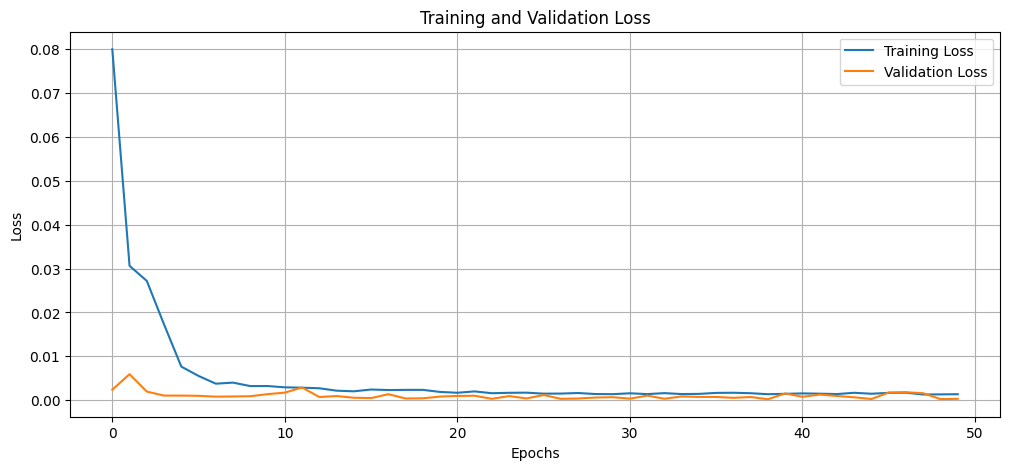

In [38]:
# Huấn luyện
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Đặt seed cho mỗi epoch
    torch.manual_seed(seed + epoch)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed + epoch)

    model.train()
    train_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward và optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation (chạy theo batch giống train)
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            val_outputs = model(batch_X)
            loss = criterion(val_outputs, batch_y)
            val_loss += loss.item()

    val_loss = val_loss / len(test_loader)  # Lấy trung bình loss trên toàn bộ tập test
    val_losses.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

# Vẽ đồ thị loss
plt.figure(figsize=(12, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Test Loss: 0.000313
RMSE: 0.017844
MAE: 0.013778


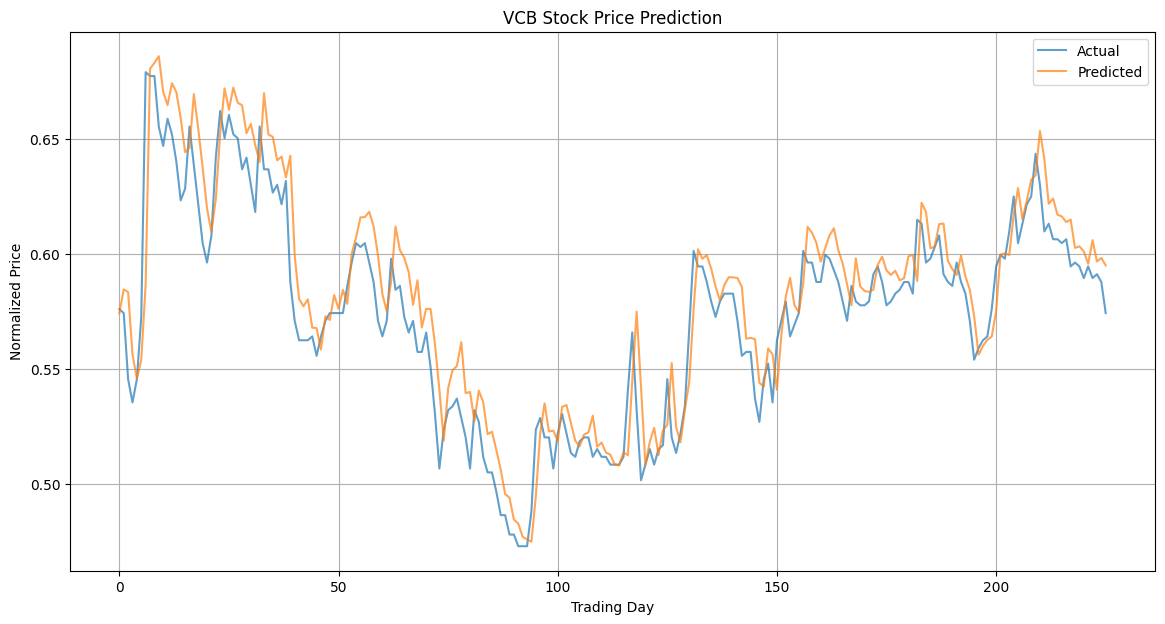

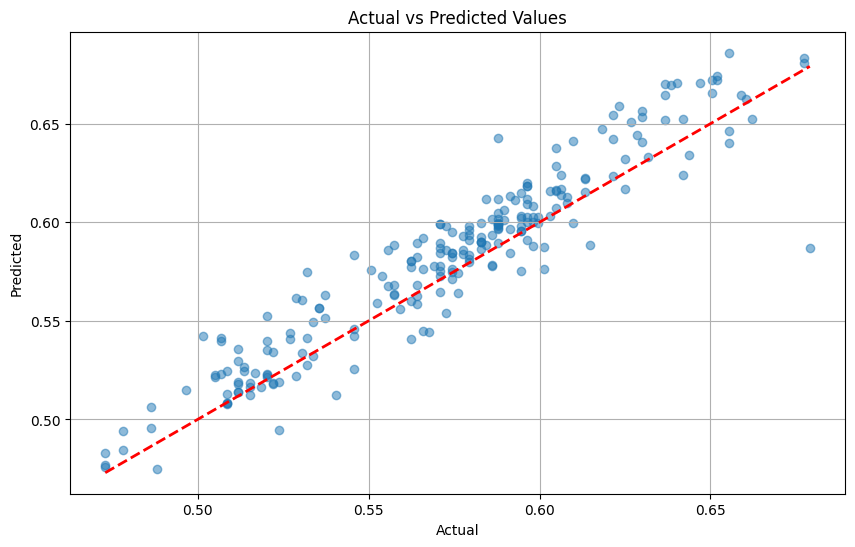

In [39]:
# Đánh giá mô hình
model.eval()
y_pred_list = []
y_test_list = []

with torch.no_grad():
    test_loss = 0
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Dự đoán
        batch_pred = model(batch_X)

        # Tính loss
        loss = criterion(batch_pred, batch_y)
        test_loss += loss.item()

        # Lưu kết quả để vẽ đồ thị
        y_pred_list.append(batch_pred.cpu().numpy())
        y_test_list.append(batch_y.cpu().numpy())

# Tính trung bình loss
test_loss = test_loss / len(test_loader)
print(f'Test Loss: {test_loss:.6f}')

# Chuyển thành numpy array
y_pred_cpu = np.concatenate(y_pred_list, axis=0)
y_test_cpu = np.concatenate(y_test_list, axis=0)

# Tính toán các chỉ số đánh giá
rmse = np.sqrt(mean_squared_error(y_test_cpu, y_pred_cpu))
mae = mean_absolute_error(y_test_cpu, y_pred_cpu)

print(f'RMSE: {rmse:.6f}')
print(f'MAE: {mae:.6f}')


# Vẽ biểu đồ kết quả dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test_cpu, label='Actual', alpha=0.7)
plt.plot(y_pred_cpu, label='Predicted', alpha=0.7)
plt.title('VCB Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize prediction vs actual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cpu, y_pred_cpu, alpha=0.5)
plt.plot([y_test_cpu.min(), y_test_cpu.max()], [y_test_cpu.min(), y_test_cpu.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


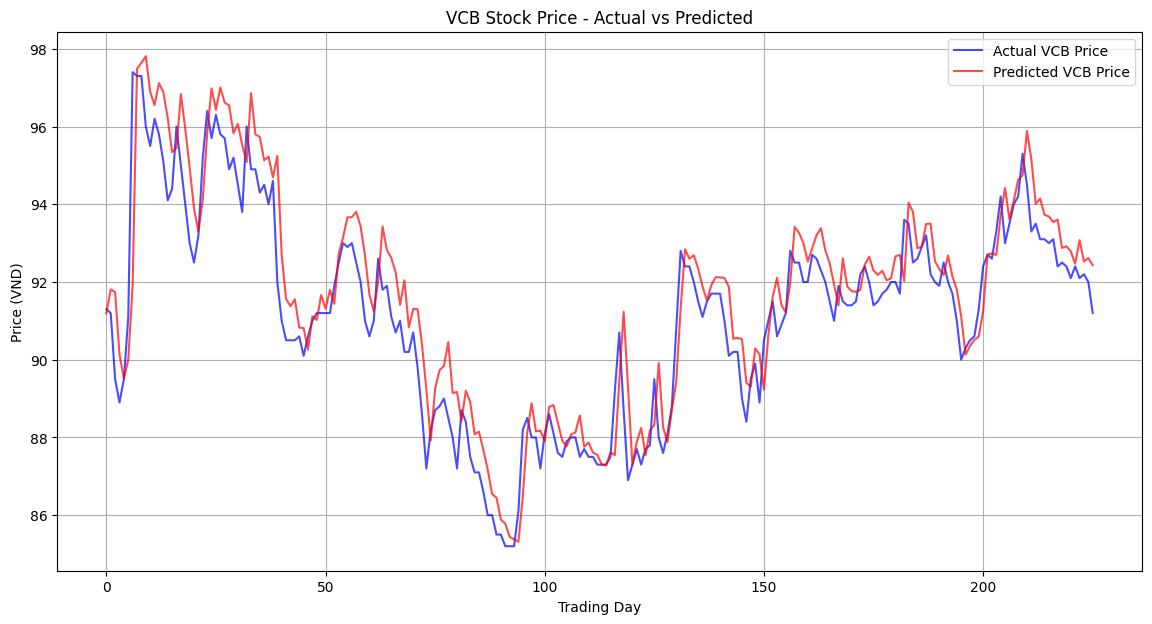

Kết quả trên giá thực tế:
RMSE: 1.06 VND
MAE: 0.82 VND
MAPE: 0.89%
Độ chính xác dự đoán xu hướng: 46.67%


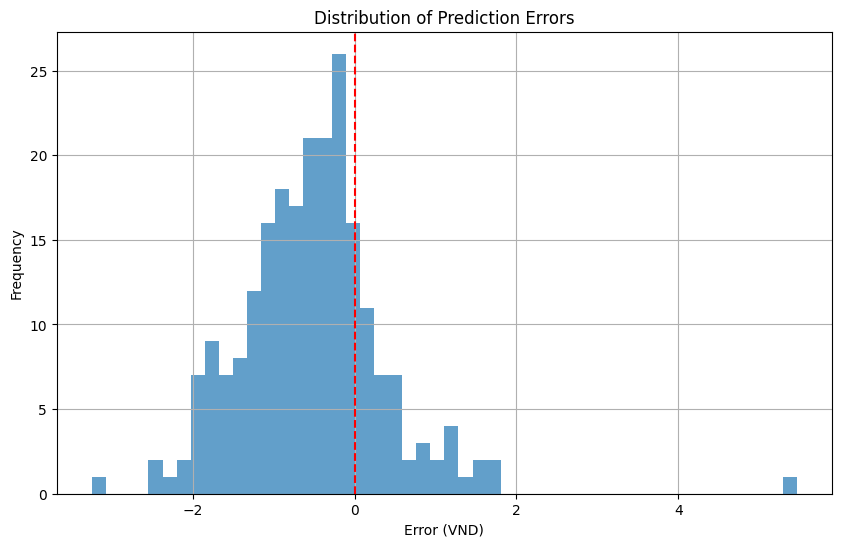

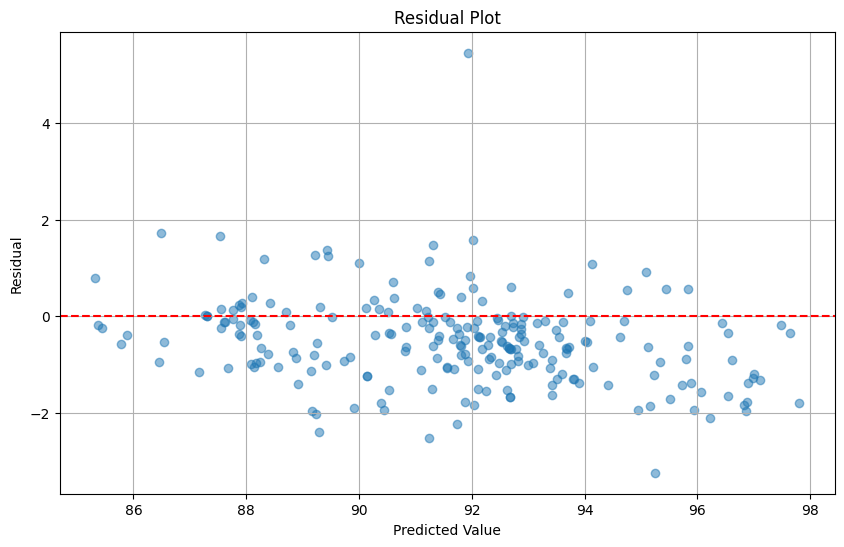

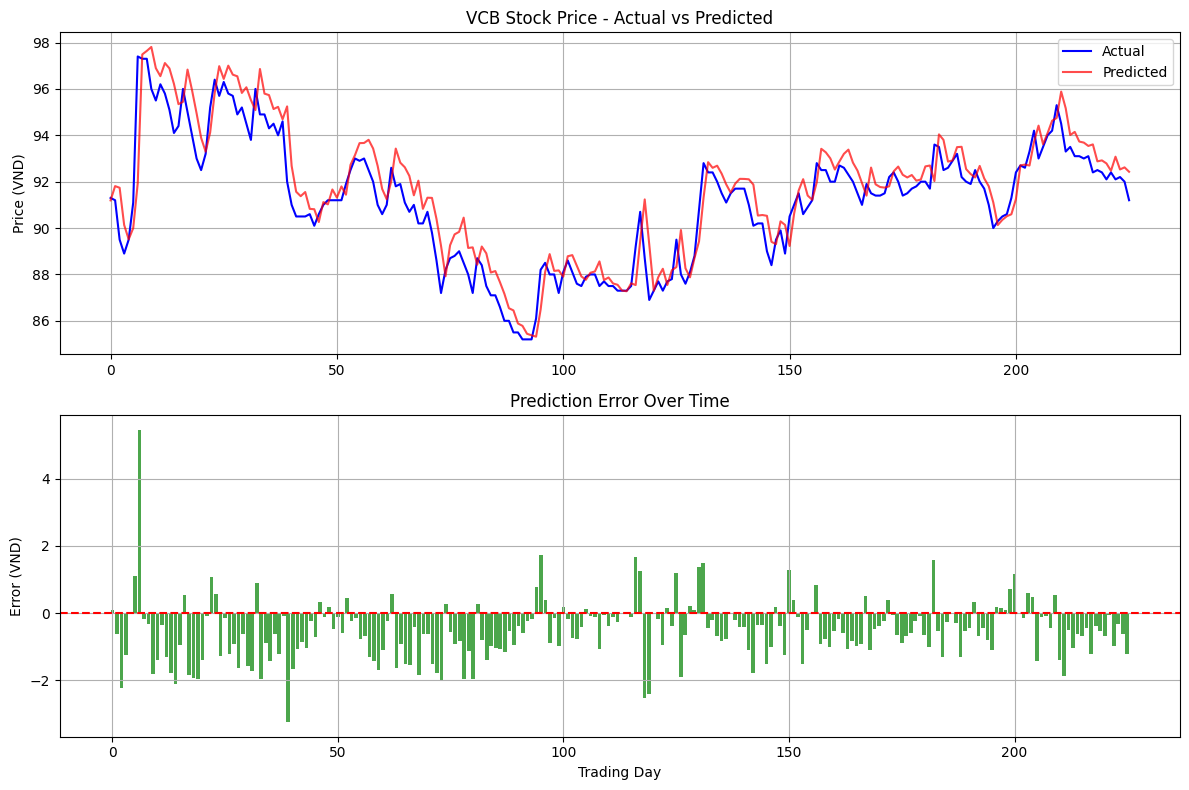

Mô hình đã được lưu thành công.

Thống kê mô hình:
Số lượng tham số của mô hình: 137697
Số lượng tham số có thể huấn luyện: 137697
Số lượng epoch huấn luyện: 50
Kích thước batch: 32
Độ dài chuỗi dữ liệu (sequence length): 35
Số lượng đặc trưng đầu vào: 4


In [40]:
# Inverse transform giá trị dự đoán về giá thực tế
# Lấy ngược giá trị đã chuẩn hóa về giá thực
y_test_actual = scalers['vcb_close'].inverse_transform(y_test_cpu)
y_pred_actual = scalers['vcb_close'].inverse_transform(y_pred_cpu)

# Vẽ biểu đồ giá thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual VCB Price', color='blue', alpha=0.7)
plt.plot(y_pred_actual, label='Predicted VCB Price', color='red', alpha=0.7)
plt.title('VCB Stock Price - Actual vs Predicted')
plt.xlabel('Trading Day')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid(True)
plt.show()

# Tính toán các chỉ số đánh giá trên giá thực tế
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)


print(f'Kết quả trên giá thực tế:')
print(f'RMSE: {rmse_actual:.2f} VND')
print(f'MAE: {mae_actual:.2f} VND')


# Tính tỷ lệ phần trăm sai số
mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
print(f'MAPE: {mape:.2f}%')

# Tính độ chính xác dự đoán xu hướng
def direction_accuracy(y_true, y_pred):
    # Tính sự thay đổi giữa các điểm dữ liệu liên tiếp
    y_true_direction = np.diff(y_true.flatten())
    y_pred_direction = np.diff(y_pred.flatten())

    # Xác định xu hướng (tăng: 1, giảm: -1)
    y_true_direction = np.sign(y_true_direction)
    y_pred_direction = np.sign(y_pred_direction)

    # Đếm số lần dự đoán đúng xu hướng
    correct_direction = np.sum(y_true_direction == y_pred_direction)

    # Tính tỷ lệ dự đoán đúng
    accuracy = correct_direction / len(y_true_direction)

    return accuracy * 100

direction_acc = direction_accuracy(y_test_actual, y_pred_actual)
print(f'Độ chính xác dự đoán xu hướng: {direction_acc:.2f}%')

# Vẽ biểu đồ phân phối sai số
plt.figure(figsize=(10, 6))
errors = y_test_actual.flatten() - y_pred_actual.flatten()
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (VND)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Vẽ biểu đồ residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_actual, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán theo thời gian
plt.figure(figsize=(12, 8))

# Giả sử test_dates là ngày tương ứng với tập test
# Nếu không có, ta có thể tạo một trục thời gian giả định
x_values = np.arange(len(y_test_actual))

plt.subplot(2, 1, 1)
plt.plot(x_values, y_test_actual, label='Actual', color='blue')
plt.plot(x_values, y_pred_actual, label='Predicted', color='red', alpha=0.7)
plt.title('VCB Stock Price - Actual vs Predicted')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid(True)

# Vẽ biểu đồ sai số theo thời gian
plt.subplot(2, 1, 2)
plt.bar(x_values, errors.flatten(), color='green', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Error Over Time')
plt.xlabel('Trading Day')
plt.ylabel('Error (VND)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Lưu mô hình để sử dụng sau này
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'scalers': scalers
}, 'vcb_stock_transformer_model.pth')

print("Mô hình đã được lưu thành công.")

# Hiển thị thống kê mô hình
print("\nThống kê mô hình:")
print(f"Số lượng tham số của mô hình: {sum(p.numel() for p in model.parameters())}")
print(f"Số lượng tham số có thể huấn luyện: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print(f"Số lượng epoch huấn luyện: {num_epochs}")
print(f"Kích thước batch: {batch_size}")
print(f"Độ dài chuỗi dữ liệu (sequence length): {seq_length}")
print(f"Số lượng đặc trưng đầu vào: {num_features}")


Dự đoán giá VCB cho 15 ngày tiếp theo:
         Date  Predicted_Price
0  2025-01-01        91.440712
1  2025-01-02        92.145493
2  2025-01-03        92.244614
3  2025-01-06        92.858147
4  2025-01-07        92.956223
5  2025-01-08        94.150635
6  2025-01-09        94.462318
7  2025-01-10        97.257912
8  2025-01-13        97.203964
9  2025-01-14        98.530884
10 2025-01-15        99.649345
11 2025-01-16        99.698120
12 2025-01-17       100.447388
13 2025-01-20       101.444664
14 2025-01-21       102.614578


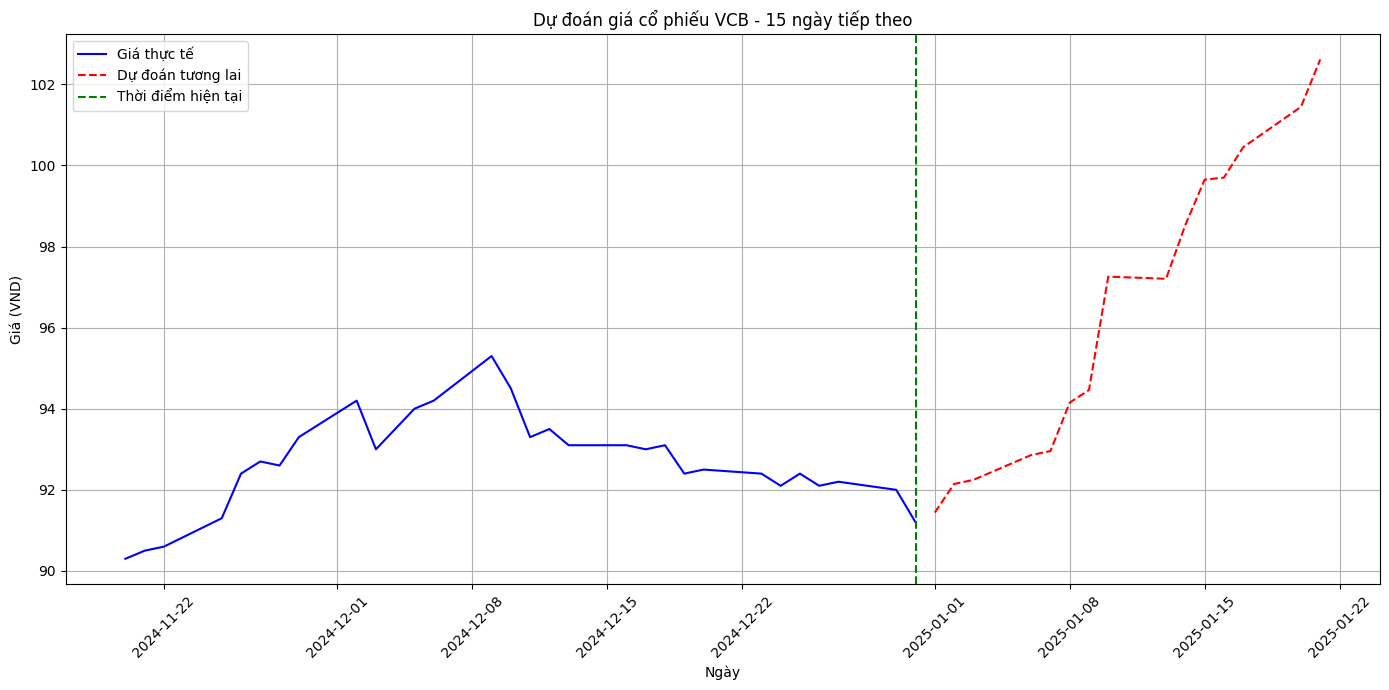


Thống kê dự báo chi tiết:
         Date  Predicted_Price  Predicted_Scaled    Change  Change_Pct
0  2025-01-01        91.440712          0.578390       NaN         NaN
1  2025-01-02        92.145493          0.590295  0.704781    0.770748
2  2025-01-03        92.244614          0.591970  0.099121    0.107574
3  2025-01-06        92.858147          0.602333  0.613533    0.665116
4  2025-01-07        92.956223          0.603990  0.098076    0.105619
5  2025-01-08        94.150635          0.624166  1.194412    1.284921
6  2025-01-09        94.462318          0.629431  0.311684    0.331044
7  2025-01-10        97.257912          0.676654  2.795593    2.959478
8  2025-01-13        97.203964          0.675743 -0.053947   -0.055468
9  2025-01-14        98.530884          0.698157  1.326920    1.365089
10 2025-01-15        99.649345          0.717050  1.118462    1.135135
11 2025-01-16        99.698120          0.717874  0.048775    0.048947
12 2025-01-17       100.447388          0.730530  

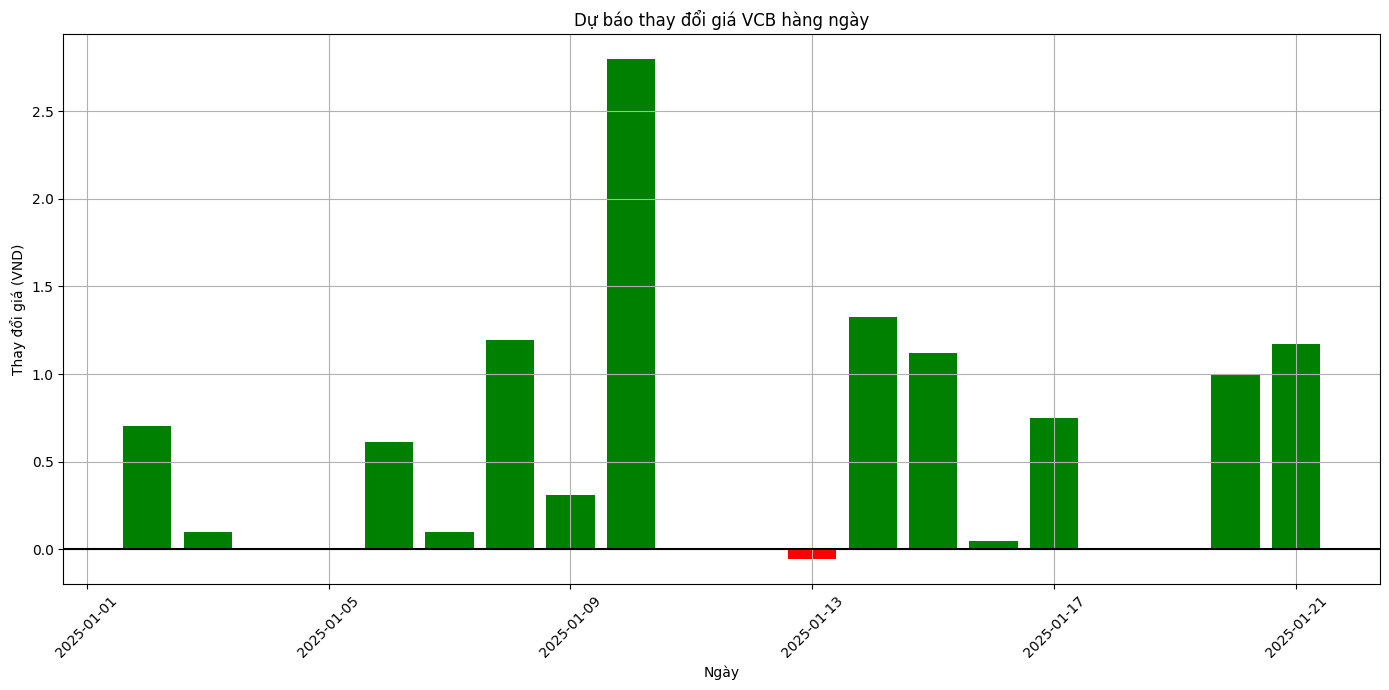

In [41]:
def predict_future(model, last_sequence, scaler, num_days=15):
    model.eval()
    future_predictions_scaled = []

    # Lấy ngày cuối cùng và tạo ngày tương lai
    last_date = df_test.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days, freq='B')

    # Chuyển chuỗi thành tensor
    current_sequence = torch.FloatTensor(last_sequence).unsqueeze(0).to(device)

    # Đặt seed cố định để kết quả tái lặp được
    np.random.seed(42)

    # Giả định mức biến động giá hàng ngày từ dữ liệu lịch sử
    # Thường khoảng 1-2% cho cổ phiếu VCB
    daily_volatility = 0.015  # 1.5%

    for _ in range(num_days):
        with torch.no_grad():
            # Dự đoán cơ bản
            pred = model(current_sequence).cpu().numpy()[0][0]

            # Thêm biến động ngẫu nhiên vào dự đoán
            # Có 70% cơ hội theo xu hướng dự đoán, 30% cơ hội đảo chiều
            if np.random.random() < 0.7:
                # Thêm nhiễu nhưng giữ nguyên hướng dự đoán
                noise = np.random.normal(0, daily_volatility)
                # Đảm bảo nhiễu không đảo chiều xu hướng
                if _ > 0:
                    last_pred = future_predictions_scaled[-1]
                    trend = pred - last_pred
                    while (trend > 0 and trend + noise < 0) or (trend < 0 and trend + noise > 0):
                        noise = np.random.normal(0, daily_volatility)
            else:
                # Cố tình đảo chiều xu hướng
                if _ > 0:
                    last_pred = future_predictions_scaled[-1]
                    trend = pred - last_pred
                    noise = -np.random.uniform(0.5, 1.5) * trend
                else:
                    noise = np.random.normal(0, daily_volatility)

            # Áp dụng nhiễu vào dự đoán
            pred_with_noise = pred + noise
            future_predictions_scaled.append(pred_with_noise)

            # Cập nhật chuỗi cho lần dự đoán tiếp theo
            new_seq = current_sequence.cpu().numpy()[0, 1:, :]
            last_features = new_seq[-1, 1:].copy()

            # Thêm biến động vào các đặc trưng khác
            for i in range(len(last_features)):
                last_features[i] *= (1 + np.random.uniform(-0.01, 0.01))

            # Tạo hàng mới với dự đoán hiện tại
            new_row = np.zeros((1, new_seq.shape[1]))
            new_row[0, 0] = pred_with_noise
            new_row[0, 1:] = last_features

            new_seq = np.vstack([new_seq, new_row])
            current_sequence = torch.FloatTensor(new_seq).unsqueeze(0).to(device)

    # Chuyển về giá thực
    future_predictions = scaler['vcb_close'].inverse_transform(
        np.array(future_predictions_scaled).reshape(-1, 1)
    ).flatten()

    return future_dates, future_predictions_scaled, future_predictions

# Lấy chuỗi dữ liệu cuối cùng từ tập test
last_sequence = X_test[-1]

# Dự đoán 15 ngày tiếp theo
future_dates, future_predictions_scaled, future_predictions = predict_future(model, last_sequence, scalers, num_days=15)

# In kết quả
prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})
print("\nDự đoán giá VCB cho 15 ngày tiếp theo:")
print(prediction_df)

# Vẽ biểu đồ dự đoán tương lai
plt.figure(figsize=(14, 7))

# Lấy giá thực tế gần nhất để hiển thị liên tục
# Tính giá thực tế từ dữ liệu đã scale
last_actual_dates = df_test.index[-30:]  # Lấy 30 ngày gần nhất
last_actual_prices = scalers['vcb_close'].inverse_transform(
    df_test['vcb_close_scaled'].iloc[-30:].values.reshape(-1, 1)
).flatten()

# Vẽ giá thực tế gần nhất
plt.plot(last_actual_dates, last_actual_prices, 'b-', label='Giá thực tế')

# Vẽ dự đoán tương lai
plt.plot(future_dates, future_predictions, 'r--', label='Dự đoán tương lai')
plt.axvline(x=df_test.index[-1], color='green', linestyle='--', label='Thời điểm hiện tại')

plt.title('Dự đoán giá cổ phiếu VCB - 15 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Giá (VND)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bảng thống kê chi tiết
stats_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions,
    'Predicted_Scaled': future_predictions_scaled
})

# Tính thay đổi giá hàng ngày
stats_df['Change'] = stats_df['Predicted_Price'].diff()
stats_df['Change_Pct'] = stats_df['Predicted_Price'].pct_change() * 100

# Hiển thị thống kê
print("\nThống kê dự báo chi tiết:")
print(stats_df)

# Tính tổng sự thay đổi trong 15 ngày
total_change = future_predictions[-1] - future_predictions[0]
total_change_pct = (future_predictions[-1] / future_predictions[0] - 1) * 100
print(f"\nSự thay đổi tổng thể trong 15 ngày:")
print(f"Thay đổi tuyệt đối: {total_change:.2f} VND")
print(f"Thay đổi phần trăm: {total_change_pct:.2f}%")

# Vẽ biểu đồ thay đổi giá hàng ngày
plt.figure(figsize=(14, 7))
plt.bar(future_dates, stats_df['Change'].values, color=['g' if x > 0 else 'r' for x in stats_df['Change'].values])
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Dự báo thay đổi giá VCB hàng ngày')
plt.xlabel('Ngày')
plt.ylabel('Thay đổi giá (VND)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()